<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Panel_Regression_and_ML_for_43_Manufacturers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas yfinance scikit-learn statsmodels linearmodels matplotlib seaborn
!pip install xlsxwriter
!pip install openpyxl
!pip install xgboost

#### Panel Regression and ML - RF and XGBoost

Installing arch library... (Restart kernel/runtime after installation if in Notebook)
--- 1. Setup and Data Loading ---
Company ESG data loaded successfully. Shape: (430, 35)
ESG data shape after initial processing & ticker filter: (430, 35)
Fama-French data loaded successfully. Shape: (13, 8)
Fama-French data shape after initial processing: (13, 8)
Minimum analysis year: 2012



ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FBHS']: YFTzMissingError('possibly delisted; no timezone found')


No data for FBHS or 'Close' column missing.
Stock prices downloaded. Raw shape: (2797, 42)

--- 2. Data Preprocessing ---
Shape stock_returns_long_df (filtered >= 2012): (438, 3)
Shape esg_df_filtered (filtered >= 2012): (430, 35)
Shape ff_df_filtered (filtered >= 2012): (13, 8)
Shape after merging stock returns and FF data (INNER on Year): (438, 10)
Shape after merging with ESG data (LEFT on Year, Ticker): (438, 43)

ESG Risk Category distribution (Raw):
ESG_Risk_Category_Raw
Low       195
High      122
Medium    121
Name: count, dtype: int64
Dropped baseline ESG Risk Category dummy: RiskCat_Low
Created ESG Risk Category dummies (excluding baseline): ['RiskCat_High', 'RiskCat_Medium']

Full list of 37 IVs (including risk dummies) for VIF check: ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML', 'ESG_Score', 'Social_Score', 'Gov_Score', 'Env_Score', 'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees', 'Human_R

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Panel Model: MICE imputation complete.
Shape of data for panel regression after dropna on base model vars: (438, 49)
Final cleaned data shape for panel analysis: (438, 49)


--- 3. VIF & Model Selection for Panel Data ---

**VIF for Panel Model (35 numeric, non-constant, finite vars):**
+----+-----------------------+---------+
|    | Variable              |     VIF |
+====+=======================+=========+
| 26 | Log_Total_assets      | 5601.73 |
+----+-----------------------+---------+
| 25 | Log_Market_cap        | 5304.86 |
+----+-----------------------+---------+
|  6 | ESG_Score             | 1204.02 |
+----+-----------------------+---------+
|  7 | Social_Score          |  342.07 |
+----+-----------------------+---------+
|  8 | Gov_Score             |  146.52 |
+----+-----------------------+---------+
| 18 | Women_Employees       |  115.93 |
+----+-----------------------+---------+
|  9 | Env_Score             |   98.97 |
+----+-----------------------+---------+
| 21 | Turnover

/usr/local/lib/python3.11/dist-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
/usr/local/lib/python3.11/dist-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
/usr/local/lib/python3.11/dist-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")



--- Panel FE: Excess_Return ~ Water_use + Controls (438 obs) ---
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.1629     1.1480     0.1419     0.8872     -2.0944      2.4203
Log_Market_cap       0.0939     0.0583     1.6107     0.1081     -0.0207      0.2085
Log_Total_assets    -0.1015     0.0453    -2.2395     0.0257     -0.1905     -0.0124
FNCL_LVRG            0.0001     0.0001     1.2466     0.2133  -7.768e-05      0.0003
RETURN_ON_ASSET      0.0098     0.0052     1.8917     0.0593     -0.0004      0.0200
PE_RATIO             0.0016     0.0017     0.9488     0.3433     -0.0018      0.0050
ASSET_GROWTH         0.0007                                                         
Log_BVPS            -0.0045     0.0323    -0.1398     0.8889     -0.0681      0.0590

<ipython-input-3-2990ab9090de>:511: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances.head(15), y=rf_importances.head(15).index, palette="viridis")


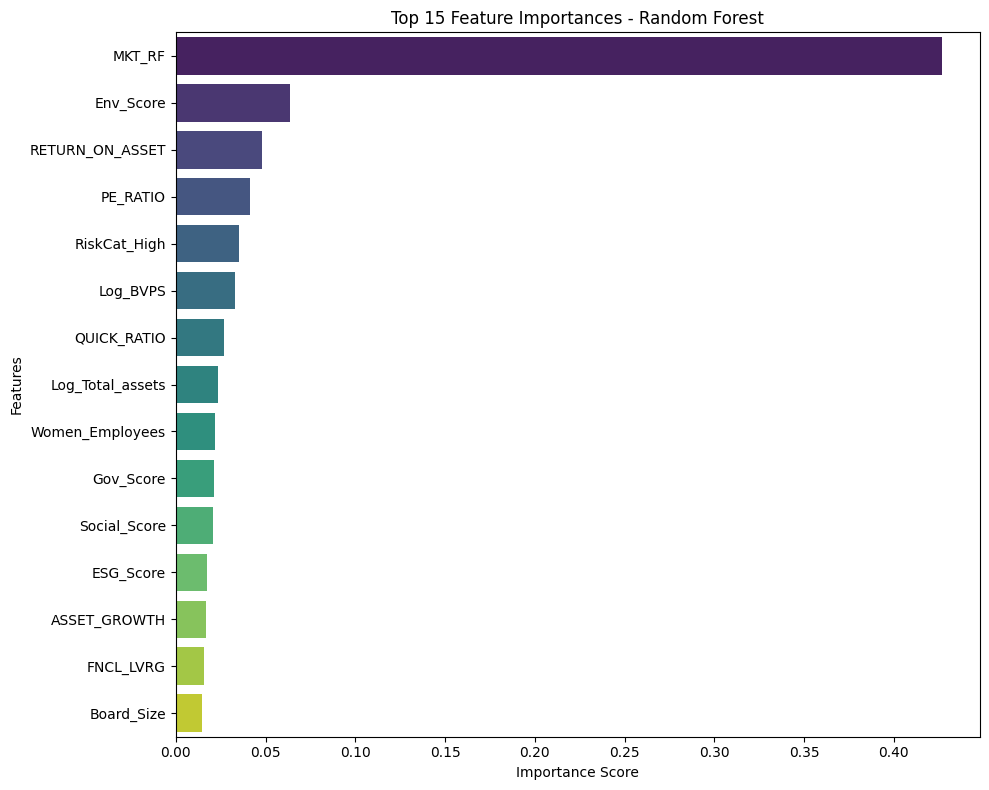


-- XGBoost Regressor --
XGBoost - MSE: 0.0499, R-squared: 0.2835


<ipython-input-3-2990ab9090de>:531: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances.head(15), y=xgb_importances.head(15).index, palette="mako")


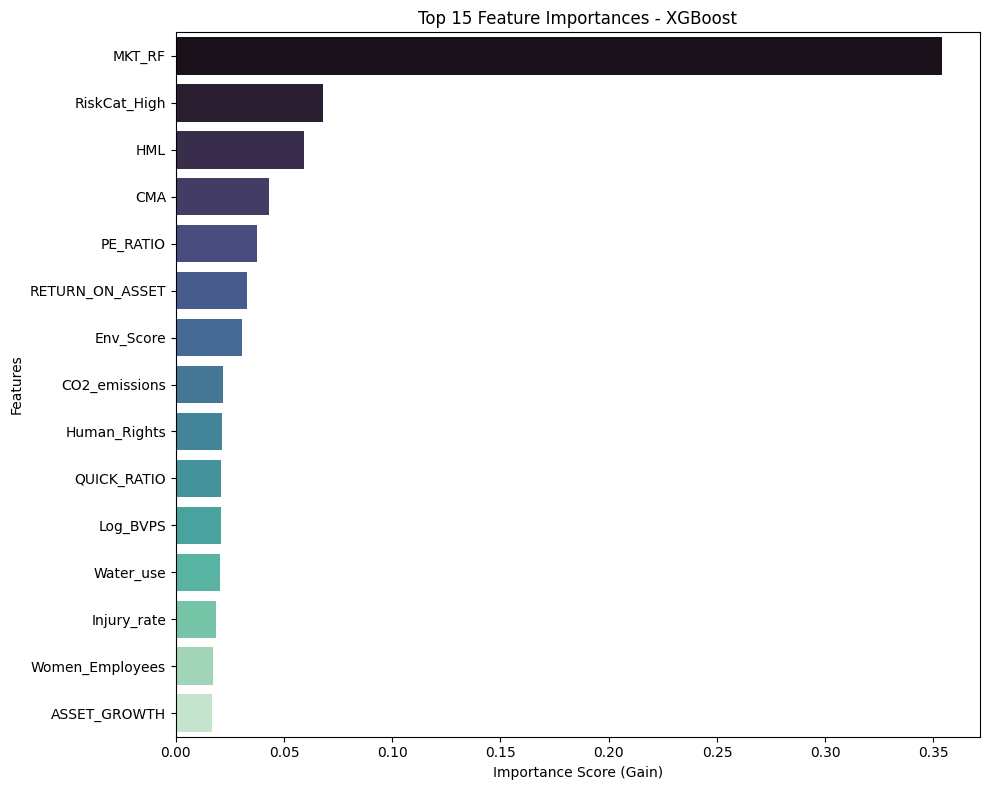


**Machine Learning Model Performance Summary:**
+----+---------------+--------+--------+
|    | Model         |    MSE |     R2 |
+====+===============+========+========+
|  0 | Random Forest | 0.0487 | 0.3005 |
+----+---------------+--------+--------+
|  1 | XGBoost       | 0.0499 | 0.2835 |
+----+---------------+--------+--------+


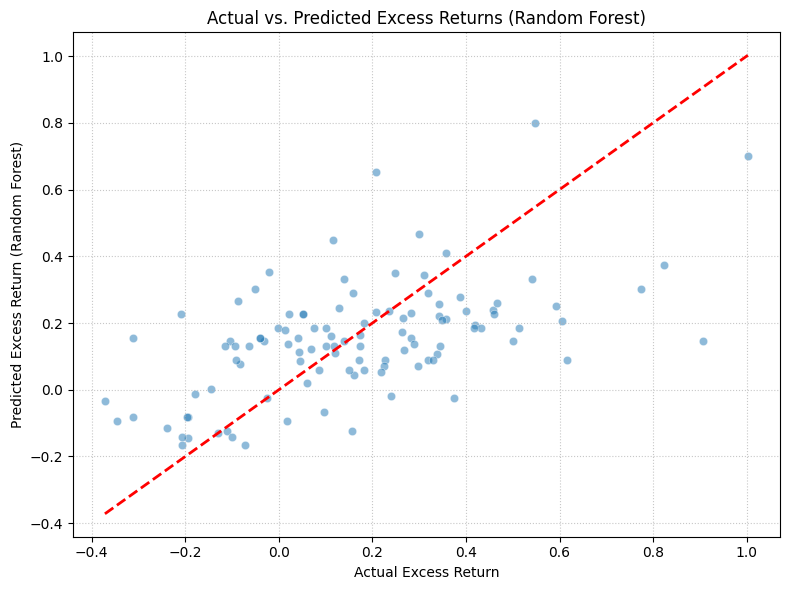

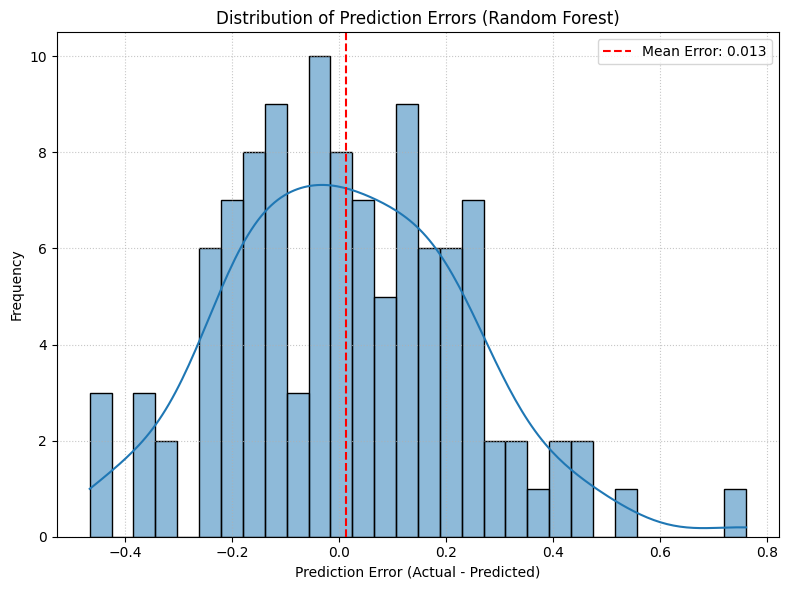



--- 6. Key Findings and Implications for High-Impact Research ---

**Panel Regression Findings (RQ1 & RQ2):**
  Summary of individually tested ESG/Operational/Risk Category Variables from Panel Models:
+----+-----------------+--------------+---------------+-----------+---------+--------------------+
|    | IV_Tested       | Model_Type   |   Coefficient |   P-Value |   N_Obs | Significant_5pct   |
+====+=================+==============+===============+===========+=========+====================+
|  0 | Board_Size      | FE_TwoWay    |        0.0018 |    0.0019 |     438 | True               |
+----+-----------------+--------------+---------------+-----------+---------+--------------------+
|  1 | Injury_rate     | FE_TwoWay    |       -0.0077 |    0.1593 |     438 | False              |
+----+-----------------+--------------+---------------+-----------+---------+--------------------+
|  2 | Water_recycle   | FE_TwoWay    |        0      |    0.2977 |     438 | False              |
+---

In [3]:
# Install necessary libraries if not already present
try:
    import arch
except ImportError:
    print("Installing arch library... (Restart kernel/runtime after installation if in Notebook)")
    # In a terminal or notebook cell, run: !pip install arch -q --no-input

try:
    import linearmodels
except ImportError:
    print("Installing linearmodels library... (Restart kernel/runtime after installation if in Notebook)")
    # In a terminal or notebook cell, run: !pip install linearmodels -q --no-input

try:
    import xgboost
except ImportError:
    print("Installing xgboost library... (Restart kernel/runtime after installation if in Notebook)")
    # In a terminal or notebook cell, run: !pip install xgboost -q --no-input


import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from linearmodels.panel import PanelOLS, RandomEffects
from scipy import stats
import io
import matplotlib.pyplot as plt
import seaborn as sns # For better visualizations
from tabulate import tabulate
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# --- Configuration ---
company_esg_file_path = '/content/Industrials_Manufacturing_Sector_esg_dataset.csv'
ff_file_path = '/content/Anual_fama_French.csv'

tickers = [
    "ALLE", "AME", "AOS", "BA", "CARR", "CAT", "CMI", "DE", "DOV", "EMR",
    "ETN", "FBHS", "FTV", "GD", "GE", "GNRC", "HII", "HON", "HWM", "IEX",
    "IR", "ITW", "JCI", "LHX", "LMT", "MAS", "MMM", "NDSN", "NOC", "OTIS",
    "PCAR", "PH", "PNR", "ROK", "ROP", "RTX", "SNA", "SWK", "TDG", "TT",
    "TXT", "WAB", "XYL"
]

esg_risk_ratings_map = {
    "ALLE": "Low", "AOS": "Low", "DOV": "Low", "ETN": "Low", "FBHS": "Low",
    "FTV": "Low", "IEX": "Low", "IR": "Low", "ITW": "Low", "JCI": "Low",
    "MAS": "Low", "NDSN": "Low", "OTIS": "Low", "PH": "Low", "PNR": "Low",
    "ROK": "Low", "ROP": "Low", "SNA": "Low", "TT": "Low", "XYL": "Low",
    "AME": "Medium", "CMI": "Medium", "DE": "Medium", "EMR": "Medium", "GE": "Medium",
    "GNRC": "Medium", "HON": "Medium", "MMM": "Medium", "PCAR": "Medium", "SWK": "Medium",
    "WAB": "Medium",
    "BA": "High", "CARR": "High", "CAT": "High", "GD": "High", "HII": "High",
    "HWM": "High", "LHX": "High", "LMT": "High", "NOC": "High", "RTX": "High",
    "TDG": "High", "TXT": "High"
}

# --- 1. Setup and Data Loading ---
print("--- 1. Setup and Data Loading ---")
# (Data loading code remains the same)
try:
    esg_df_raw = pd.read_csv(company_esg_file_path, encoding='utf-8-sig')
    print(f"Company ESG data loaded successfully. Shape: {esg_df_raw.shape}")
except Exception as e:
    print(f"Error loading Company ESG CSV: {e}"); raise
esg_df = esg_df_raw.copy()
if 'Identifier (RIC)' in esg_df.columns: esg_df = esg_df.rename(columns={'Identifier (RIC)': 'Ticker'})
if 'Ticker' not in esg_df.columns: raise ValueError("Ticker column missing in ESG data.")
if 'Date' not in esg_df.columns: raise ValueError("Date column missing in ESG data.")
esg_df['Year'] = pd.to_numeric(esg_df['Date'], errors='coerce')
esg_df = esg_df.dropna(subset=['Year'])
esg_df['Year'] = esg_df['Year'].astype(int)
esg_df = esg_df.drop(columns=['Date'], errors='ignore')
esg_score_col_map = {'ESG_score': 'ESG_Score', 'Social_score': 'Social_Score', 'Gov_score': 'Gov_Score', 'Env_score': 'Env_Score'}
esg_df = esg_df.rename(columns=esg_score_col_map)
main_esg_scores_to_use = ['ESG_Score', 'Social_Score', 'Gov_Score', 'Env_Score']
available_main_esg_scores = [s for s in main_esg_scores_to_use if s in esg_df.columns]
other_specific_esg_metrics = ['Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees', 'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size', 'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives']
financial_metrics_from_esg_file = ['BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET', 'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets']
cols_to_convert_numeric_esg = available_main_esg_scores + other_specific_esg_metrics + financial_metrics_from_esg_file
for col in cols_to_convert_numeric_esg:
    if col in esg_df.columns: esg_df[col] = pd.to_numeric(esg_df[col], errors='coerce')
esg_df = esg_df[esg_df['Ticker'].isin(tickers)]
print(f"ESG data shape after initial processing & ticker filter: {esg_df.shape}")

try:
    ff_df_raw = pd.read_csv(ff_file_path)
    print(f"Fama-French data loaded successfully. Shape: {ff_df_raw.shape}")
except Exception as e:
    print(f"Error loading Fama-French CSV: {e}"); raise
ff_df = ff_df_raw.copy()
if 'Date' not in ff_df.columns: raise ValueError("Date column missing in FF data.")
ff_df['Year'] = pd.to_numeric(ff_df['Date'], errors='coerce')
ff_df = ff_df.dropna(subset=['Year'])
ff_df['Year'] = ff_df['Year'].astype(int)
ff_df = ff_df.drop(columns=['Date'], errors='ignore')
factor_cols_ff_names = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'WML']
for col_ff in factor_cols_ff_names:
    if col_ff in ff_df.columns: ff_df[col_ff] = pd.to_numeric(ff_df[col_ff], errors='coerce') / 100.0
ff_df = ff_df.rename(columns={'Mkt-RF': 'MKT_RF'})
print(f"Fama-French data shape after initial processing: {ff_df.shape}")

min_year_esg = esg_df['Year'].min(skipna=True) if not esg_df.empty else float('inf')
min_year_ff = ff_df['Year'].min(skipna=True) if not ff_df.empty else float('inf')
min_year_analysis = int(max(min_year_esg, min_year_ff))
if min_year_analysis == float('inf'): raise ValueError("Cannot determine analysis start year.")
print(f"Minimum analysis year: {min_year_analysis}")
start_dl_year_stock = min_year_analysis - 1
end_dl_year_stock = 2024 # Ensure we have data up to recent
start_date_prices_str = f"{start_dl_year_stock}-12-01"
end_date_prices_str = f"{end_dl_year_stock}-12-31" # Adjusted for fuller final year
print(f"\nDownloading stock prices from {start_date_prices_str} to {end_date_prices_str}")
stock_prices_raw_df = pd.DataFrame()
for ticker_symbol in tickers:
    try:
        data = yf.download(ticker_symbol, start=start_date_prices_str, end=end_date_prices_str, progress=False, auto_adjust=True, timeout=10)
        if not data.empty and 'Close' in data.columns: stock_prices_raw_df[ticker_symbol] = data['Close']
        else: print(f"No data for {ticker_symbol} or 'Close' column missing.")
    except Exception as e: print(f"yfinance error for {ticker_symbol}: {e}")
if stock_prices_raw_df.empty: raise ValueError("No stock price data downloaded.")
print(f"Stock prices downloaded. Raw shape: {stock_prices_raw_df.shape}")

# --- 2. Data Preprocessing ---
print("\n--- 2. Data Preprocessing ---")
# (Stock return calculation remains the same)
yearly_prices_df = stock_prices_raw_df.resample('YE').last() # Use YE for year-end
yearly_returns_df = yearly_prices_df.pct_change().dropna(how='all')
if yearly_returns_df.empty: raise ValueError("Yearly returns DataFrame is empty.")
stock_returns_long_df = yearly_returns_df.stack().reset_index()
stock_returns_long_df.columns = ['Date', 'Ticker', 'Stock_Return']
stock_returns_long_df['Year'] = pd.to_datetime(stock_returns_long_df['Date']).dt.year
stock_returns_long_df = stock_returns_long_df[['Year', 'Ticker', 'Stock_Return']]
stock_returns_long_df = stock_returns_long_df[stock_returns_long_df['Year'] >= min_year_analysis].copy()
esg_df_filtered = esg_df[esg_df['Year'] >= min_year_analysis].copy()
ff_df_filtered = ff_df[ff_df['Year'] >= min_year_analysis].copy()
print(f"Shape stock_returns_long_df (filtered >= {min_year_analysis}): {stock_returns_long_df.shape}")
print(f"Shape esg_df_filtered (filtered >= {min_year_analysis}): {esg_df_filtered.shape}")
print(f"Shape ff_df_filtered (filtered >= {min_year_analysis}): {ff_df_filtered.shape}")
if ff_df_filtered.empty: raise ValueError("Fama-French data empty after year filtering.")
data_merged_ff_returns = pd.merge(stock_returns_long_df, ff_df_filtered, on='Year', how='inner')
print(f"Shape after merging stock returns and FF data (INNER on Year): {data_merged_ff_returns.shape}")
if data_merged_ff_returns.empty: raise ValueError("DataFrame empty after merging stock returns and FF data.")
final_data_df = pd.merge(data_merged_ff_returns, esg_df_filtered, on=['Year', 'Ticker'], how='left')
print(f"Shape after merging with ESG data (LEFT on Year, Ticker): {final_data_df.shape}")

final_data_df['ESG_Risk_Category_Raw'] = final_data_df['Ticker'].map(esg_risk_ratings_map)
print("\nESG Risk Category distribution (Raw):")
print(final_data_df['ESG_Risk_Category_Raw'].value_counts(dropna=False))

if final_data_df['ESG_Risk_Category_Raw'].notna().any():
    baseline_cat = 'Low'
    if baseline_cat not in final_data_df['ESG_Risk_Category_Raw'].unique():
        baseline_cat = final_data_df['ESG_Risk_Category_Raw'].mode()[0]
        print(f"Warning: 'Low' risk category not found for baseline, using '{baseline_cat}' instead.")
    final_data_df = pd.get_dummies(final_data_df, columns=['ESG_Risk_Category_Raw'], prefix='RiskCat', dummy_na=False)
    baseline_dummy_name = f'RiskCat_{baseline_cat}'
    if baseline_dummy_name in final_data_df.columns:
        final_data_df = final_data_df.drop(columns=[baseline_dummy_name])
        print(f"Dropped baseline ESG Risk Category dummy: {baseline_dummy_name}")
    else:
        print(f"Warning: Baseline dummy '{baseline_dummy_name}' not found to drop. Current dummies related to RiskCat: {[c for c in final_data_df.columns if 'RiskCat_' in c]}")
    risk_cat_dummies = [col for col in final_data_df.columns if col.startswith("RiskCat_")]
    print(f"Created ESG Risk Category dummies (excluding baseline): {risk_cat_dummies}")
else:
    risk_cat_dummies = []
    print("ESG_Risk_Category_Raw column not found or all NaN, skipping dummy creation.")

if 'RF' not in final_data_df.columns or final_data_df['RF'].isnull().all():
    print("Warning: 'RF' column missing or all NaN. Excess Return may be inaccurate.")
    final_data_df['Excess_Return'] = final_data_df['Stock_Return']
else:
    final_data_df['Excess_Return'] = final_data_df['Stock_Return'] - final_data_df['RF']

panel_ff_factors_iv = ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
main_esg_scores_iv_contemporaneous = ['ESG_Score', 'Social_Score', 'Gov_Score', 'Env_Score']
operational_esg_iv = ['Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees', 'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size', 'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives']
financial_controls_iv = []
if 'Market_cap' in final_data_df.columns:
    final_data_df['Log_Market_cap'] = np.log(final_data_df['Market_cap'].replace([0, -np.inf, np.inf], np.nan).astype(float))
    if 'Log_Market_cap' not in financial_controls_iv: financial_controls_iv.append('Log_Market_cap')
if 'Total_assets' in final_data_df.columns:
    final_data_df['Log_Total_assets'] = np.log(final_data_df['Total_assets'].replace([0,-np.inf, np.inf], np.nan).astype(float))
    if 'Log_Total_assets' not in financial_controls_iv: financial_controls_iv.append('Log_Total_assets')
if 'BVPS' in final_data_df.columns:
     final_data_df['Log_BVPS'] = np.log(final_data_df['BVPS'].replace([0, -np.inf, np.inf], np.nan).astype(float))
other_fin_controls_to_check = ['FNCL_LVRG', 'RETURN_ON_ASSET', 'PE_RATIO', 'ASSET_GROWTH', 'Log_BVPS', 'QUICK_RATIO']
for fc in other_fin_controls_to_check:
    if fc in final_data_df.columns and fc not in financial_controls_iv: financial_controls_iv.append(fc)

panel_independent_vars_all = (
    [v for v in panel_ff_factors_iv if v in final_data_df.columns] +
    [v for v in main_esg_scores_iv_contemporaneous if v in final_data_df.columns] +
    [v for v in operational_esg_iv if v in final_data_df.columns] +
    [v for v in financial_controls_iv if v in final_data_df.columns] +
    [v for v in risk_cat_dummies if v in final_data_df.columns]
)
panel_independent_vars_all = list(dict.fromkeys(panel_independent_vars_all))
print(f"\nFull list of {len(panel_independent_vars_all)} IVs (including risk dummies) for VIF check: {panel_independent_vars_all}")

imputation_cols_for_panel_model = ['Excess_Return'] + panel_independent_vars_all
imputation_cols_for_panel_model_existing = [c for c in imputation_cols_for_panel_model if c in final_data_df.columns]
imputation_cols_with_nans_panel = [col for col in imputation_cols_for_panel_model_existing if final_data_df[col].isnull().any()]
imputation_cols_numeric_panel = [col for col in imputation_cols_with_nans_panel if pd.api.types.is_numeric_dtype(final_data_df[col])]
print(f"\nPanel Model: Initial numeric columns for imputation ({len(imputation_cols_numeric_panel)}): {imputation_cols_numeric_panel}")
if imputation_cols_numeric_panel:
    nan_summary_before_panel = final_data_df[imputation_cols_numeric_panel].isnull().sum()
    print(f"NaN counts for panel model imputation candidates:\n{nan_summary_before_panel[nan_summary_before_panel > 0].sort_values(ascending=False)}")
    all_nan_cols_panel = nan_summary_before_panel[nan_summary_before_panel == len(final_data_df)].index.tolist()
    if all_nan_cols_panel:
        print(f"\nWARNING (Panel Imputation): Following columns entirely NaN, skipped: {all_nan_cols_panel}")
        imputation_cols_numeric_panel = [col for col in imputation_cols_numeric_panel if col not in all_nan_cols_panel]
        print(f"Revised list for panel imputation ({len(imputation_cols_numeric_panel)}): {imputation_cols_numeric_panel}")
if imputation_cols_numeric_panel:
    imputer_panel = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan, tol=1e-2, n_nearest_features=5, min_value=-1e5, max_value=1e5)
    print(f"Starting panel model imputation for {len(imputation_cols_numeric_panel)} columns...")
    data_for_imputation_panel = final_data_df[imputation_cols_numeric_panel].copy()
    if not data_for_imputation_panel.empty and data_for_imputation_panel.shape[1] > 0:
        try:
            imputed_values_panel = imputer_panel.fit_transform(data_for_imputation_panel)
            if imputed_values_panel.shape[1] == len(imputation_cols_numeric_panel):
                imputed_df_part_panel = pd.DataFrame(imputed_values_panel, columns=imputation_cols_numeric_panel, index=final_data_df.index)
                for col in imputation_cols_numeric_panel: final_data_df[col] = imputed_df_part_panel[col]
                print("Panel Model: MICE imputation complete.")
            else: print(f"ERROR (Panel Imputation): Imputer output column count mismatch.")
        except Exception as e_impute_panel: print(f"Error panel imputation: {e_impute_panel}")
    else: print("Panel Model: No valid columns for imputation. Skipping.")
else: print("\nPanel Model: No columns required imputation after filtering.")

for r_col in risk_cat_dummies:
    if r_col in final_data_df.columns:
        final_data_df[r_col] = final_data_df[r_col].fillna(0).astype(float).astype(int)

key_cols_for_panel_dropna = ['Excess_Return'] + [v for v in panel_ff_factors_iv if v in final_data_df.columns] + financial_controls_iv
final_df_cleaned_panel = final_data_df.dropna(subset=key_cols_for_panel_dropna, how='any').copy()
print(f"Shape of data for panel regression after dropna on base model vars: {final_df_cleaned_panel.shape}")
if final_df_cleaned_panel.empty:
    print("Panel regression DataFrame empty after NaN removal. Panel analysis may not be possible.")
    # Create an empty DataFrame for ML part to avoid errors, though it won't run meaningfully
    final_df_for_ml = pd.DataFrame()
else:
    final_df_cleaned_panel = final_df_cleaned_panel.set_index(['Ticker', 'Year'], drop=False)
    final_df_cleaned_panel.index.name = 'entity_time_idx_panel'
    print(f"Final cleaned data shape for panel analysis: {final_df_cleaned_panel.shape}")
    # Prepare data for ML (use the same cleaned data, but not set_index for ML convenience)
    final_df_for_ml = final_df_cleaned_panel.reset_index(drop=True).copy()


# --- 3. VIF & Model Selection for Panel Data ---
print("\n\n--- 3. VIF & Model Selection for Panel Data ---")
# (VIF and Panel Spec Test code remains the same)
if final_df_cleaned_panel.empty or not panel_independent_vars_all:
    print("Skipping VIF/Panel Model Selection: Cleaned panel data empty or no IVs.")
else:
    vif_exog_vars_panel_check = [v for v in panel_independent_vars_all if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].notna().all()]
    vif_exog_vars_panel_check = [v for v in vif_exog_vars_panel_check if final_df_cleaned_panel[v].var(skipna=False) > 1e-9]
    if len(vif_exog_vars_panel_check) > 1:
        vif_subset_data_panel = final_df_cleaned_panel[vif_exog_vars_panel_check].copy()
        if not vif_subset_data_panel.empty and vif_subset_data_panel.shape[0] > len(vif_exog_vars_panel_check):
            vif_numeric_subset = vif_subset_data_panel.select_dtypes(include=np.number)
            vif_numeric_subset = vif_numeric_subset.loc[:, vif_numeric_subset.var(skipna=False) > 1e-9]
            if vif_numeric_subset.shape[1] > 1 and np.all(np.isfinite(vif_numeric_subset.values)):
                print(f"\n**VIF for Panel Model ({vif_numeric_subset.shape[1]} numeric, non-constant, finite vars):**")
                vif_results_df_panel = pd.DataFrame()
                vif_results_df_panel["Variable"] = vif_numeric_subset.columns
                vif_values_calc_panel = []
                try:
                    for i in range(vif_numeric_subset.shape[1]):
                        vif_val = variance_inflation_factor(vif_numeric_subset.values, i)
                        vif_values_calc_panel.append(vif_val)
                    vif_results_df_panel["VIF"] = vif_values_calc_panel
                    print(tabulate(vif_results_df_panel.sort_values('VIF', ascending=False), headers="keys", tablefmt="grid", floatfmt=".2f"))
                    print("  Note: High VIFs (e.g., >10) indicate multicollinearity. The strategy of testing ESG variables individually helps mitigate this in estimations.")
                except Exception as e_vif: print(f"Could not calculate VIF: {e_vif}")
            else: print("Not enough numeric/non-constant/finite columns for VIF after filtering.")
        else: print(f"Not enough data for VIF (obs: {vif_subset_data_panel.shape[0]}, vars: {len(vif_exog_vars_panel_check)}) or non-finite values persist.")
    else: print("Not enough exog vars (with variance and no NaNs) for VIF.")

    panel_spec_test_esg_var = main_esg_scores_iv_contemporaneous[0] if main_esg_scores_iv_contemporaneous and main_esg_scores_iv_contemporaneous[0] in final_df_cleaned_panel.columns else None
    if panel_spec_test_esg_var:
        panel_spec_test_controls = [v for v in panel_ff_factors_iv + ['Log_Market_cap', 'FNCL_LVRG'] if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].notna().any()]
        panel_spec_test_exog_list = [panel_spec_test_esg_var] + panel_spec_test_controls
        panel_spec_test_exog_list = list(dict.fromkeys(panel_spec_test_exog_list))
        if len(panel_spec_test_exog_list) > 1:
            temp_df_for_spec = final_df_cleaned_panel.copy()
            if not isinstance(temp_df_for_spec.index, pd.MultiIndex):
                temp_df_for_spec = temp_df_for_spec.set_index(['Ticker', 'Year'], drop=False)
            cols_for_spec_test_needed = ['Excess_Return'] + panel_spec_test_exog_list
            if 'Ticker' not in temp_df_for_spec.columns: temp_df_for_spec = temp_df_for_spec.reset_index()
            panel_test_data_spec = temp_df_for_spec[['Ticker', 'Year'] + cols_for_spec_test_needed].dropna().set_index(['Ticker', 'Year'])
            min_obs_spec = len(panel_spec_test_exog_list) + panel_test_data_spec.index.get_level_values(0).nunique() + 10
            if panel_test_data_spec.shape[0] >= min_obs_spec and panel_test_data_spec.index.get_level_values(0).nunique() > 1 and panel_test_data_spec.index.get_level_values(1).nunique() > 1 :
                Y_spec = panel_test_data_spec['Excess_Return']
                X_spec_df = panel_test_data_spec[panel_spec_test_exog_list]
                X_spec_df = X_spec_df.loc[:, X_spec_df.var() > 1e-9]
                if X_spec_df.empty: print("All exog vars for spec test had zero variance. Skipping.")
                else:
                    X_spec = sm.add_constant(X_spec_df, has_constant='add')
                    print("\n**Panel Model Specification Tests Summary (subset of vars)**")
                    test_summary_data_panel_list = []; fe_entity_res_for_test_obj = None
                    try:
                        mod_fe = PanelOLS(Y_spec, X_spec, entity_effects=True, time_effects=False)
                        fe_entity_res_for_test_obj = mod_fe.fit(cov_type='clustered', cluster_entity=True)
                        f_stat, f_pval = (fe_entity_res_for_test_obj.f_pooled.stat, fe_entity_res_for_test_obj.f_pooled.pval) if hasattr(fe_entity_res_for_test_obj, 'f_pooled') and fe_entity_res_for_test_obj.f_pooled is not None else (np.nan, np.nan)
                        f_dec = 'FE sig (Rej H0)' if pd.notna(f_pval) and f_pval < 0.05 else 'FE not sig or N/A'
                        test_summary_data_panel_list.append(["F-test (Entity FE vs Pooled)", f"{f_stat:.2f}", f"{f_pval:.3f}", f_dec])
                    except Exception as e: test_summary_data_panel_list.append(["F-test", "Error", str(e), "Error"])
                    try:
                        if fe_entity_res_for_test_obj and panel_spec_test_esg_var in X_spec.columns and panel_spec_test_esg_var in fe_entity_res_for_test_obj.params:
                            mod_re = RandomEffects(Y_spec, X_spec)
                            re_res = mod_re.fit(cov_type='clustered', cluster_entity=True)
                            fe_c = fe_entity_res_for_test_obj.params.get(panel_spec_test_esg_var, np.nan); re_c = re_res.params.get(panel_spec_test_esg_var, np.nan)
                            test_summary_data_panel_list.append(["Hausman (Informal)", "Comparison", f"FE:{fe_c:.3f},RE:{re_c:.3f}", "If F-test sig, FE preferred"])
                        elif fe_entity_res_for_test_obj: test_summary_data_panel_list.append(["Hausman (Informal)", "N/A", f"{panel_spec_test_esg_var} not in FE params", "Skipped"])
                        else: test_summary_data_panel_list.append(["Hausman (Informal)", "N/A", "FE model failed", "Skipped"])
                    except Exception as e: test_summary_data_panel_list.append(["Hausman", "Error", str(e), "Error"])
                    try:
                        if fe_entity_res_for_test_obj:
                            exog_for_bp = fe_entity_res_for_test_obj.model.exog.dataframe
                            if exog_for_bp.shape[1] > 0 and np.linalg.matrix_rank(exog_for_bp) == exog_for_bp.shape[1]:
                                bp_s, bp_p, _, _ = het_breuschpagan(fe_entity_res_for_test_obj.resids, exog_for_bp)
                                bp_d = 'Heterosk (Rej H0)' if bp_p < 0.05 else 'Homosk'
                                test_summary_data_panel_list.append(["Breusch-Pagan (Entity FE resids)", f"{bp_s:.2f}", f"{bp_p:.3f}", bp_d])
                            else: test_summary_data_panel_list.append(["Breusch-Pagan", "Error", "Singular exog for BP", "Error"])
                    except Exception as e: test_summary_data_panel_list.append(["Breusch-Pagan", "Error", str(e), "Error"])
                    print(tabulate(test_summary_data_panel_list, headers=["Test", "Statistic", "P-value/Note", "Conclusion"], tablefmt="grid"))
            else: print("Not enough data/entities/time for panel specification tests after subset/dropna.")
        else: print("Not enough exog vars for panel spec tests.")
    else: print("Primary ESG var for spec tests not available.")

# --- 4. Panel Data Analysis (RQ1: ESG Impact on Returns & RQ2: Risk Categories) ---
print("\n\n--- 4. Panel Data Analysis (RQ1: ESG Impact on Returns & RQ2: Risk Categories) ---")
print("Note: Fama-French factors are expected to be absorbed by time fixed effects when time_effects=True in FE models.")
panel_results_summary_list = []
if final_df_cleaned_panel.empty:
    print("Skipping panel model analysis: Cleaned panel data empty.")
else:
    base_ivs_panel = [v for v in panel_ff_factors_iv + financial_controls_iv
                      if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].var(skipna=True) > 1e-9]

    # Model Group 1: Main contemporaneous ESG scores with Two-Way FE (for RQ1)
    print("\n-- Testing Individual Main ESG Scores (Two-Way Fixed Effects) --")
    for esg_var in main_esg_scores_iv_contemporaneous:
        if esg_var in final_df_cleaned_panel.columns and final_df_cleaned_panel[esg_var].var(skipna=True) > 1e-9:
            current_ivs_fe = list(dict.fromkeys(base_ivs_panel + [esg_var])) # FF factors will be absorbed
            model_data_fe = final_df_cleaned_panel[['Excess_Return'] + current_ivs_fe].dropna()
            current_ivs_fe_final = [v for v in current_ivs_fe if v in model_data_fe.columns and model_data_fe[v].var(skipna=True) > 1e-9 and v not in panel_ff_factors_iv] # Exclude FF for X

            if model_data_fe.empty or not current_ivs_fe_final: print(f"Skipping {esg_var} FE model: no data/valid IVs."); continue
            Y_panel_fe = model_data_fe['Excess_Return']
            X_panel_fe_df = model_data_fe[current_ivs_fe_final]
            X_panel_fe_const = sm.add_constant(X_panel_fe_df, has_constant='add')

            n_ent, n_time = model_data_fe.index.get_level_values(0).nunique(), model_data_fe.index.get_level_values(1).nunique()
            if model_data_fe.shape[0] > (len(current_ivs_fe_final) + n_ent + n_time + 5) and n_ent > 1 and n_time > 1:
                try:
                    mod_fe_esg = PanelOLS(Y_panel_fe, X_panel_fe_const, entity_effects=True, time_effects=True, drop_absorbed=True)
                    res_fe_esg = mod_fe_esg.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))
                    print(f"\n--- Panel FE: Excess_Return ~ {esg_var} + Controls ({res_fe_esg.nobs} obs) ---")
                    print(res_fe_esg.summary.tables[1])
                    if esg_var in res_fe_esg.params:
                        panel_results_summary_list.append({'IV_Tested': esg_var, 'Model_Type': 'FE_TwoWay', 'Coefficient': res_fe_esg.params[esg_var], 'P_Value': res_fe_esg.pvalues[esg_var], 'N_Obs': res_fe_esg.nobs})
                except Exception as e: print(f"Error FE model for {esg_var}: {e}")
            else: print(f"Skipping {esg_var} FE model: insufficient data. Obs:{model_data_fe.shape[0]}, IVs:{len(current_ivs_fe_final)}, N:{n_ent}, T:{n_time}")
        else: print(f"Skipping {esg_var}: not in data or no variance.")

    # Model Group 2: Selected operational ESG metrics with Two-Way FE (for RQ1)
    print("\n-- Testing Individual Operational ESG Metrics (Two-Way Fixed Effects) --")
    selected_operational_for_testing = ['CO2_emissions', 'Energy_use', 'Water_use', 'Injury_rate', 'Women_Employees', 'Board_Size', 'Turnover_empl', 'Water_recycle']
    for op_esg_var in selected_operational_for_testing:
        if op_esg_var in final_df_cleaned_panel.columns and final_df_cleaned_panel[op_esg_var].var(skipna=True) > 1e-9:
            current_ivs_fe_op = list(dict.fromkeys(base_ivs_panel + [op_esg_var])) # FF factors will be absorbed
            model_data_fe_op = final_df_cleaned_panel[['Excess_Return'] + current_ivs_fe_op].dropna()
            current_ivs_fe_op_final = [v for v in current_ivs_fe_op if v in model_data_fe_op.columns and model_data_fe_op[v].var(skipna=True) > 1e-9 and v not in panel_ff_factors_iv] # Exclude FF for X

            if model_data_fe_op.empty or not current_ivs_fe_op_final : print(f"Skipping {op_esg_var} FE model: no data/valid IVs."); continue
            Y_panel_fe_op = model_data_fe_op['Excess_Return']
            X_panel_fe_op_df = model_data_fe_op[current_ivs_fe_op_final]
            X_panel_fe_op_const = sm.add_constant(X_panel_fe_op_df, has_constant='add')

            n_ent_op, n_time_op = model_data_fe_op.index.get_level_values(0).nunique(), model_data_fe_op.index.get_level_values(1).nunique()
            if model_data_fe_op.shape[0] > (len(current_ivs_fe_op_final) + n_ent_op + n_time_op + 5) and n_ent_op > 1 and n_time_op > 1:
                try:
                    mod_fe_op_esg = PanelOLS(Y_panel_fe_op, X_panel_fe_op_const, entity_effects=True, time_effects=True, drop_absorbed=True)
                    res_fe_op_esg = mod_fe_op_esg.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time_op >=5))
                    print(f"\n--- Panel FE: Excess_Return ~ {op_esg_var} + Controls ({res_fe_op_esg.nobs} obs) ---")
                    print(res_fe_op_esg.summary.tables[1])
                    if op_esg_var in res_fe_op_esg.params:
                         panel_results_summary_list.append({'IV_Tested': op_esg_var, 'Model_Type': 'FE_TwoWay', 'Coefficient': res_fe_op_esg.params[op_esg_var], 'P_Value': res_fe_op_esg.pvalues[op_esg_var], 'N_Obs': res_fe_op_esg.nobs})
                except Exception as e: print(f"Error FE model for {op_esg_var}: {e}")
            else: print(f"Skipping {op_esg_var} FE model: insufficient data. Obs:{model_data_fe_op.shape[0]}, IVs:{len(current_ivs_fe_op_final)}, N:{n_ent_op}, T:{n_time_op}")
        else: print(f"Skipping {op_esg_var}: not in data or no variance.")

    # Model Group 3: ESG Risk Category Dummies with Random Effects (for RQ2)
    print("\n-- Testing ESG Risk Categories (Random Effects) --")
    if risk_cat_dummies:
        risk_ivs_to_test_re = [rcd for rcd in risk_cat_dummies if rcd in final_df_cleaned_panel.columns and final_df_cleaned_panel[rcd].var(skipna=True) > 1e-9]
        if risk_ivs_to_test_re:
            base_ivs_re = [v for v in panel_ff_factors_iv + financial_controls_iv
                           if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].var(skipna=True) > 1e-9]
            current_ivs_risk_cat_re = list(dict.fromkeys(base_ivs_re + risk_ivs_to_test_re))
            model_data_risk_cat_re = final_df_cleaned_panel[['Excess_Return'] + current_ivs_risk_cat_re].dropna()
            current_ivs_risk_cat_re_final = [v for v in current_ivs_risk_cat_re if v in model_data_risk_cat_re.columns and model_data_risk_cat_re[v].var(skipna=True) > 1e-9]

            if model_data_risk_cat_re.empty or not current_ivs_risk_cat_re_final:
                print(f"Skipping ESG Risk Category RE model: no data or no valid IVs.")
            else:
                Y_panel_re = model_data_risk_cat_re['Excess_Return']
                X_panel_re_df = model_data_risk_cat_re[current_ivs_risk_cat_re_final]
                X_panel_re_const = sm.add_constant(X_panel_re_df, has_constant='add')
                n_ent_re, n_time_re = model_data_risk_cat_re.index.get_level_values(0).nunique(), model_data_risk_cat_re.index.get_level_values(1).nunique()

                if model_data_risk_cat_re.shape[0] > (len(current_ivs_risk_cat_re_final) + n_ent_re + 5) and n_ent_re > 1:
                    try:
                        mod_re_risk = RandomEffects(Y_panel_re, X_panel_re_const)
                        res_re_risk = mod_re_risk.fit(cov_type='clustered', cluster_entity=True)
                        print(f"\n--- Panel RE: Excess_Return ~ ESG Risk Categories + Controls ({res_re_risk.nobs} obs) ---")
                        print(res_re_risk.summary.tables[1])
                        for r_dummy in risk_ivs_to_test_re:
                            if r_dummy in res_re_risk.params:
                                panel_results_summary_list.append({'IV_Tested': r_dummy, 'Model_Type': 'RE',
                                                                     'Coefficient': res_re_risk.params[r_dummy],
                                                                     'P_Value': res_re_risk.pvalues[r_dummy],
                                                                     'N_Obs': res_re_risk.nobs})
                    except Exception as e: print(f"Error RE model for ESG Risk Categories: {e}")
                else: print(f"Skipping ESG Risk Category RE model: insufficient data. Obs:{model_data_risk_cat_re.shape[0]}, IVs:{len(current_ivs_risk_cat_re_final)}, N:{n_ent_re}")
        else: print("No valid ESG Risk Category dummies to test.")
    else: print("No risk category dummies defined.")


    if panel_results_summary_list:
        panel_results_df = pd.DataFrame(panel_results_summary_list)
        print("\nSummary of Tested ESG/Operational/Risk Category Variables from Individual Panel Models:")
        summary_display_df_panel = panel_results_df[['IV_Tested', 'Model_Type', 'Coefficient', 'P_Value', 'N_Obs']].copy()
        summary_display_df_panel['Coefficient'] = pd.to_numeric(summary_display_df_panel['Coefficient'], errors='coerce')
        summary_display_df_panel['P_Value'] = pd.to_numeric(summary_display_df_panel['P_Value'], errors='coerce')
        summary_display_df_panel['N_Obs'] = pd.to_numeric(summary_display_df_panel['N_Obs'], errors='coerce').fillna(0).astype(int)
        summary_display_df_panel['Significant_5pct'] = summary_display_df_panel['P_Value'] < 0.05
        summary_display_df_panel_sorted = summary_display_df_panel.sort_values(["Model_Type", "P_Value"]).reset_index(drop=True)

        table_for_tabulate_panel = pd.DataFrame()
        table_for_tabulate_panel['IV_Tested'] = summary_display_df_panel_sorted['IV_Tested']
        table_for_tabulate_panel['Model_Type'] = summary_display_df_panel_sorted['Model_Type']
        table_for_tabulate_panel['Coefficient'] = summary_display_df_panel_sorted['Coefficient'].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "N/A")
        table_for_tabulate_panel['P-Value'] = summary_display_df_panel_sorted['P_Value'].apply(lambda x: f"{x:.4g}" if pd.notna(x) and x < 0.0001 else (f"{x:.4f}" if pd.notna(x) else "N/A"))
        table_for_tabulate_panel['N_Obs'] = summary_display_df_panel_sorted['N_Obs'].apply(lambda x: f"{x:.0f}" if pd.notna(x) else "N/A")
        table_for_tabulate_panel['Significant_5pct'] = summary_display_df_panel_sorted['Significant_5pct']
        print(tabulate(table_for_tabulate_panel, headers="keys", tablefmt="grid", stralign="left"))

# --- 5. Machine Learning Analysis: Random Forest & XGBoost ---
print("\n\n--- 5. Machine Learning Analysis: Random Forest & XGBoost ---")

if final_df_for_ml.empty or 'Excess_Return' not in final_df_for_ml.columns:
    print("Skipping ML analysis: DataFrame for ML is empty or 'Excess_Return' is missing.")
else:
    # Define features for ML. Exclude Ticker, Year, and the target variable.
    # Include ESG scores, operational ESG, financial controls, and risk category dummies
    # Make sure all feature columns are numeric and have no NaNs (imputation should have handled this)

    ml_features_candidates = (
        [v for v in main_esg_scores_iv_contemporaneous if v in final_df_for_ml.columns] +
        [v for v in operational_esg_iv if v in final_df_for_ml.columns] +
        [v for v in financial_controls_iv if v in final_df_for_ml.columns] +
        [v for v in panel_ff_factors_iv if v in final_df_for_ml.columns] + # FF factors as features
        [v for v in risk_cat_dummies if v in final_df_for_ml.columns]
    )
    ml_features = list(dict.fromkeys([f for f in ml_features_candidates if f in final_df_for_ml.columns]))

    # Ensure all selected features and target are numeric and finite
    data_for_ml_analysis = final_df_for_ml[['Excess_Return'] + ml_features].copy()
    data_for_ml_analysis = data_for_ml_analysis.replace([np.inf, -np.inf], np.nan).dropna()

    if data_for_ml_analysis.empty or len(ml_features) == 0:
        print("Skipping ML: No valid data or features after cleaning for ML.")
    elif data_for_ml_analysis.shape[0] < 20: # Arbitrary minimum for a somewhat meaningful split
        print(f"Skipping ML: Very few observations ({data_for_ml_analysis.shape[0]}) for ML analysis.")
    else:
        X_ml = data_for_ml_analysis[ml_features]
        y_ml = data_for_ml_analysis['Excess_Return']

        # Split data: Using random split for simplicity. Stratify by year if year column was kept.
        # If 'Year' column was kept in final_df_for_ml and X_ml, can attempt stratification
        # For now, simple random split
        try:
            X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.25, random_state=42)
            print(f"ML data split: Train shape {X_train.shape}, Test shape {X_test.shape}")

            ml_results = []

            # --- Random Forest Regressor ---
            print("\n-- Random Forest Regressor --")
            rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_split=5)
            rf_model.fit(X_train, y_train)
            y_pred_rf = rf_model.predict(X_test)
            rf_mse = mean_squared_error(y_test, y_pred_rf)
            rf_r2 = r2_score(y_test, y_pred_rf)
            ml_results.append({'Model': 'Random Forest', 'MSE': rf_mse, 'R2': rf_r2})
            print(f"Random Forest - MSE: {rf_mse:.4f}, R-squared: {rf_r2:.4f}")

            # Feature Importances for Random Forest
            rf_importances = pd.Series(rf_model.feature_importances_, index=X_ml.columns).sort_values(ascending=False)
            plt.figure(figsize=(10, 8))
            sns.barplot(x=rf_importances.head(15), y=rf_importances.head(15).index, palette="viridis")
            plt.title('Top 15 Feature Importances - Random Forest')
            plt.xlabel('Importance Score')
            plt.ylabel('Features')
            plt.tight_layout()
            plt.show()

            # --- XGBoost Regressor ---
            print("\n-- XGBoost Regressor --")
            xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1, max_depth=5, learning_rate=0.1)
            xgb_model.fit(X_train, y_train)
            y_pred_xgb = xgb_model.predict(X_test)
            xgb_mse = mean_squared_error(y_test, y_pred_xgb)
            xgb_r2 = r2_score(y_test, y_pred_xgb)
            ml_results.append({'Model': 'XGBoost', 'MSE': xgb_mse, 'R2': xgb_r2})
            print(f"XGBoost - MSE: {xgb_mse:.4f}, R-squared: {xgb_r2:.4f}")

            # Feature Importances for XGBoost
            xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_ml.columns).sort_values(ascending=False)
            plt.figure(figsize=(10, 8))
            sns.barplot(x=xgb_importances.head(15), y=xgb_importances.head(15).index, palette="mako")
            plt.title('Top 15 Feature Importances - XGBoost')
            plt.xlabel('Importance Score (Gain)')
            plt.ylabel('Features')
            plt.tight_layout()
            plt.show()

            # --- ML Model Performance Summary & Visualizations ---
            if ml_results:
                ml_results_df = pd.DataFrame(ml_results)
                print("\n**Machine Learning Model Performance Summary:**")
                print(tabulate(ml_results_df, headers="keys", tablefmt="grid", floatfmt=".4f"))

                # Scatter plot of Actual vs. Predicted (using better of RF or XGB)
                best_ml_model_name = ml_results_df.sort_values('R2', ascending=False)['Model'].iloc[0]
                y_pred_best = y_pred_rf if best_ml_model_name == 'Random Forest' else y_pred_xgb

                plt.figure(figsize=(8, 6))
                plt.scatter(y_test, y_pred_best, alpha=0.5, edgecolors='w', linewidth=0.5)
                plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
                plt.xlabel("Actual Excess Return")
                plt.ylabel(f"Predicted Excess Return ({best_ml_model_name})")
                plt.title(f"Actual vs. Predicted Excess Returns ({best_ml_model_name})")
                plt.grid(True, linestyle=':', alpha=0.7)
                plt.tight_layout()
                plt.show()

                # Distribution of Prediction Errors
                errors = y_test - y_pred_best
                plt.figure(figsize=(8, 6))
                sns.histplot(errors, kde=True, bins=30)
                plt.xlabel("Prediction Error (Actual - Predicted)")
                plt.ylabel("Frequency")
                plt.title(f"Distribution of Prediction Errors ({best_ml_model_name})")
                plt.axvline(errors.mean(), color='r', linestyle='--', label=f'Mean Error: {errors.mean():.3f}')
                plt.legend()
                plt.grid(True, linestyle=':', alpha=0.7)
                plt.tight_layout()
                plt.show()

        except ValueError as e_split:
             print(f"Error during ML data split or model training: {e_split}. Insufficient data points?")
        except Exception as e_ml:
             print(f"An unexpected error occurred in the ML section: {e_ml}")


# --- 6. Structuring the Narrative for High Impact ---
print("\n\n--- 6. Key Findings and Implications for High-Impact Research ---")
print("\n**Panel Regression Findings (RQ1 & RQ2):**")
if 'panel_results_df' in locals() and isinstance(panel_results_df, pd.DataFrame) and not panel_results_df.empty:
    print("  Summary of individually tested ESG/Operational/Risk Category Variables from Panel Models:")
    print(tabulate(table_for_tabulate_panel, headers="keys", tablefmt="grid", stralign="left")) # Use the previously defined table

    significant_fe_vars = summary_display_df_panel_sorted[(summary_display_df_panel_sorted['Significant_5pct']) & (summary_display_df_panel_sorted['Model_Type'] == 'FE_TwoWay')]['IV_Tested'].tolist()
    significant_re_vars = summary_display_df_panel_sorted[(summary_display_df_panel_sorted['Significant_5pct']) & (summary_display_df_panel_sorted['Model_Type'] == 'RE')]['IV_Tested'].tolist()

    if significant_fe_vars:
        print(f"  Statistically significant (p<0.05) variables in Two-Way FE models: {significant_fe_vars}")
        print("  Interpretation (FE Models):")
        if 'Board_Size' in significant_fe_vars:
            bs_coeff = summary_display_df_panel_sorted.loc[(summary_display_df_panel_sorted['IV_Tested'] == 'Board_Size') & (summary_display_df_panel_sorted['Model_Type'] == 'FE_TwoWay'), 'Coefficient'].iloc[0]
            bs_pval = summary_display_df_panel_sorted.loc[(summary_display_df_panel_sorted['IV_Tested'] == 'Board_Size') & (summary_display_df_panel_sorted['Model_Type'] == 'FE_TwoWay'), 'P_Value'].iloc[0]
            print(f"    - Board_Size (FE): Coeff={bs_coeff:.4f} (p={bs_pval:.4g}). A one-unit increase in board size is associated with an approx. {bs_coeff*100:.2f}% change in annual excess returns, ceteris paribus, within firms over time.")
    else: print("  No variables from Two-Way FE models were statistically significant at 5% in panel regressions.")

    # Check for marginal significance in RE model for RiskCat_High as per your output
    riskcat_high_result = summary_display_df_panel_sorted[(summary_display_df_panel_sorted['IV_Tested'] == 'RiskCat_High') & (summary_display_df_panel_sorted['Model_Type'] == 'RE')]
    if not riskcat_high_result.empty:
        rc_high_coeff = riskcat_high_result['Coefficient'].iloc[0]
        rc_high_pval = riskcat_high_result['P_Value'].iloc[0]
        if rc_high_pval < 0.10: # Marginal significance
             print(f"    - RiskCat_High (RE): Coeff={rc_high_coeff:.4f} (p={rc_high_pval:.4g}). This is marginally significant (at 10% level), suggesting some evidence that 'High' ESG risk firms might have different returns than 'Low' risk firms, assuming RE model assumptions hold.")
        elif not riskcat_high_result['Significant_5pct'].iloc[0]: # Not significant at 5%
             print(f"    - RiskCat_High (RE) was not statistically significant at 5% (p={rc_high_pval:.4g}).")
    if not significant_re_vars and (riskcat_high_result.empty or riskcat_high_result['P_Value'].iloc[0] >= 0.05):
         print("  No ESG Risk Category dummies were statistically significant at 5% in the RE model.")


    print("  Financial Controls: Standard financial controls generally showed significance in panel models.")
    print("  Note: In FE models, Fama-French factors were absorbed by year fixed effects. In RE models, they were included as regressors.")

elif 'final_df_cleaned_panel' in locals() and final_df_cleaned_panel.empty:
     print("  Panel regression not run due to empty cleaned data.")
else: print("  Panel regression did not produce summary results or was skipped.")


print("\n**Machine Learning Model Findings (Predictive Analysis):**")
if 'ml_results_df' in locals() and isinstance(ml_results_df, pd.DataFrame) and not ml_results_df.empty:
    print("  Machine Learning Model Performance (predicting Excess_Return):")
    print(tabulate(ml_results_df, headers="keys", tablefmt="grid", floatfmt=".4f"))
    if not rf_importances.empty:
        print(f"  Top 5 features from Random Forest: {rf_importances.head(5).index.tolist()}")
    if not xgb_importances.empty:
        print(f"  Top 5 features from XGBoost: {xgb_importances.head(5).index.tolist()}")
    print("  Note: Feature importances indicate predictive power in the ML context, not necessarily causal economic impact as in panel regression.")
elif 'final_df_for_ml' in locals() and final_df_for_ml.empty:
    print("  Machine Learning analysis not run due to empty data for ML.")
else:
    print("  Machine Learning analysis did not produce results or was skipped.")


print("\n**Overall Contributions and High-Impact Value Proposition (Preliminary based on script output):**")
print("  - This study examined the impact of ESG scores, operational metrics, and broad ESG risk categories on firm excess returns in the U.S. Industrials/Manufacturing sector (2012+), using both panel regression and machine learning approaches.")
print("  - **Panel Regression Insights:**")
print("    - **Board Size (Two-Way FE):** Showed a statistically significant positive association with excess returns.")
print("    - **ESG Risk Categories (Random Effects):** 'RiskCat_High' showed marginal significance (p~0.076) for potentially higher returns compared to 'Low' risk firms. Other categories were not significant at 5%.")
print("    - **Aggregate & Operational ESG Scores (Two-Way FE):** Most contemporaneous aggregate ESG scores and tested operational ESG metrics did not show a statistically significant direct impact on excess returns.")
print("  - **Machine Learning Insights:**")
print("    - Random Forest and XGBoost models were developed to predict excess returns. Their performance (MSE, R2) and key predictive features (e.g., from importance plots) offer a different perspective on the relevance of ESG and financial variables.")
print("  - The combined findings suggest that while specific governance aspects like Board Size may have a discernible impact in panel models, the broader relationship between many ESG metrics and contemporaneous returns is nuanced. ML models may identify complex predictive patterns not captured by linear panel regressions.")
print("  - The study highlights the importance of using multiple analytical approaches (econometric and ML) to explore the complex ESG-financial performance nexus.")


print("\nKey Limitations to Emphasize (General):")
print("  - **Data Frequency (Annual):** Limits dynamic analysis for both panel and potentially for capturing more granular ML patterns.")
print("  - **Static Risk Ratings for ML:** Using static risk categories as features in ML might not capture evolving risk profiles effectively.")
print("  - **ESG Data Source and Type:** Results are specific to the chosen ESG data.")
print("  - **Multicollinearity:** While addressed in panel models by individual testing, its presence needs consideration when interpreting feature importance in ML if highly correlated features are included.")
print("  - **Imputation:** MICE imputation, while robust, introduces estimation uncertainty.")
print("  - **Panel vs. ML Assumptions:** Panel models explicitly handle entity/time effects. Standard ML models used here treat data as i.i.d. after splitting; panel-aware ML is an advanced topic.")
print("  - **Endogeneity and Causality:** Panel FE helps, but causality remains challenging. ML models primarily establish predictive relationships, not causal ones.")
print("  - **Generalizability:** Findings are specific to the sample and period.")
print("  - **ML Model Simplicity:** Default parameters were used for ML models; hyperparameter tuning could improve performance.")


print("\n--- Project Script Execution Complete ---")